# 1 - Introduction

> The introduction chapter should be filled with identity, big picture of the dataset used, and the objectives to be achieved.

Name : Hillidatul Ilmi

Batch : FTDS-012

URL Dataset : https://www.kaggle.com/datasets/sshikamaru/fruit-recognition

Dataset : Fruit Classification.

Context :

Indonesia is an agricultural country where most of the population lives from farming, so agriculture is a sector that plays an important role in the welfare of the Indonesian population (Anggriawan, 2013). One of the agricultural sectors that is quite well developed in Indonesia is fruit. Fruits are one of the commodities that are widely consumed and have a big role in fulfilling nutrition and body health. The higher demand for fruits can also open up opportunities for the increase in fruit agribusiness, so that it is expected to be able to compete with other countries, especially in the face of current free trade. Improving fruit quality is one of the efforts to overcome this competition in addition to increasing production and business efficiency (Asrianti, 2013).

The demand for fruits is always there at any time whether people choose to buy fruit in traditional markets, in supermarkets, buy online and even export abroad. But the problem is that sometimes there are long queues in sorting the types of fruit to be sent abroad or there are long queues to pay at the cashier. Some cases of problems, among others:

- Why are some fruits delivered late so the fruit is not in good condition?

- Why do you have to wait in long queues to pay for fruit at the cashier?


Objective : 

Based on the problems that have been described at the beginning, I tried to use an artificial network of image processing that can classify the types of fruit, so that what will be sent can arrive on time without sorting the fruit manually and customers waiting in long lines to buy fruit because the cashier detects the type of fruit to be made purchased by the customer.

# 2 - Import Libraries

> The first cell in the notebook must contain and contain only all the libraries used in the project.

In [ ]:
# Define Libraries

# library calling dataset
import pandas as pd
import numpy as np 
from google.colab import drive

# library visualization
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from PIL import Image
import glob, cv2, os
import pathlib

# library preprocessing data
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# library model definition and training algoritma
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.layers import Rescaling

# library model evaluation
from sklearn.metrics import classification_report 
import warnings
warnings.filterwarnings('ignore')

the library that I will use to do milstone 2 Phase 2 from the numpy library, pandas, matplotlib and several various TensorFlow modules for use in supporting the running of a model.

# 3 - Data Loading

> This section contains the data preparation process before further data exploration is carried out. The Data Loading process can be in the form of giving a new name for each column, checking the size of the dataset, etc.

In [ ]:
# fetch data from gdrive local storage
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# go to folder "fruit"
% cd /content/drive/MyDrive/fruit

/content/drive/MyDrive/fruit


In [ ]:
! ls

milestone  model.png


In [ ]:
# data to be used in model definition and training
main_path = '/content/drive/MyDrive/fruit/milestone'
train_dir = os.path.join(main_path,'train')
val_dir = os.path.join(main_path,'test')

Dataset Information :

- Total number of images as much 22495.
- Training set size as much 16854 images (one fruit per image).
- Test set size as much 5641 images (one fruit per image).
- Number of classes as much 33 (fruits).
- Image size as big as 100x100 pixels.

Content

- The training folder that contains 33 subfolders in which training images for each fruit are located. There is a total of 16854 images.
- The testing folder that contains 5641 testing images

# 3 - Exploratory Data Analysis (EDA)

> This section contains data exploration on the dataset above using queries, grouping, simple visualization, word cloud, and so on.

In [ ]:
# Viewing data elements
print('Folder Dataset Information : \n' + '='*50)
for labelpath, labelnames, filenames in os.walk('.'):
  print(f"There is {len(labelnames)} folder and have {len(filenames)} files inside {labelpath}")

Folder Dataset Information : 
There is 1 folder and have 1 files inside .
There is 2 folder and have 0 files inside ./milestone
There is 1 folder and have 0 files inside ./milestone/test
There is 0 folder and have 5641 files inside ./milestone/test/test
There is 33 folder and have 0 files inside ./milestone/train
There is 0 folder and have 447 files inside ./milestone/train/Plum
There is 0 folder and have 738 files inside ./milestone/train/Tomato
There is 0 folder and have 490 files inside ./milestone/train/Raspberry
There is 0 folder and have 492 files inside ./milestone/train/Pomegranate
There is 0 folder and have 444 files inside ./milestone/train/Pepper Green
There is 0 folder and have 475 files inside ./milestone/train/Watermelon
There is 0 folder and have 450 files inside ./milestone/train/Potato Red
There is 0 folder and have 666 files inside ./milestone/train/Pepper Red
There is 0 folder and have 492 files inside ./milestone/train/Strawberry
There is 0 folder and have 490 files

In [ ]:
# data train in each labels

print('Fruit Labels in Train Set : \n' + '='*50)
for labelpath, labelname, file in os.walk(train_dir):
  if labelpath.split("/")[-1] != 'train':
    print(f'There are {len(file)} images classification as {labelpath.split("/")[-1]}')

Fruit Labels in Train Set : 
There are 447 images classification as Plum
There are 738 images classification as Tomato
There are 490 images classification as Raspberry
There are 492 images classification as Pomegranate
There are 444 images classification as Pepper Green
There are 475 images classification as Watermelon
There are 450 images classification as Potato Red
There are 666 images classification as Pepper Red
There are 492 images classification as Strawberry
There are 490 images classification as Pineapple
There are 492 images classification as Papaya
There are 492 images classification as Peach
There are 490 images classification as Limes
There are 490 images classification as Passion Fruit
There are 696 images classification as Pear
There are 492 images classification as Lemon
There are 479 images classification as Orange
There are 490 images classification as Mango
There are 438 images classification as Onion White
There are 466 images classification as Kiwi
There are 490 im

In [ ]:
# see label class on training dataset
labels = pathlib.Path(train_dir)
label_names=np.array(sorted([item.name for item in labels.glob('*')]))
print(label_names)

['Apple Braeburn' 'Apple Granny Smith' 'Apricot' 'Avocado' 'Banana'
 'Blueberry' 'Cactus fruit' 'Cantaloupe' 'Cherry' 'Clementine' 'Corn'
 'Cucumber Ripe' 'Grape Blue' 'Kiwi' 'Lemon' 'Limes' 'Mango' 'Onion White'
 'Orange' 'Papaya' 'Passion Fruit' 'Peach' 'Pear' 'Pepper Green'
 'Pepper Red' 'Pineapple' 'Plum' 'Pomegranate' 'Potato Red' 'Raspberry'
 'Strawberry' 'Tomato' 'Watermelon']


Found 16854 files belonging to 33 classes.


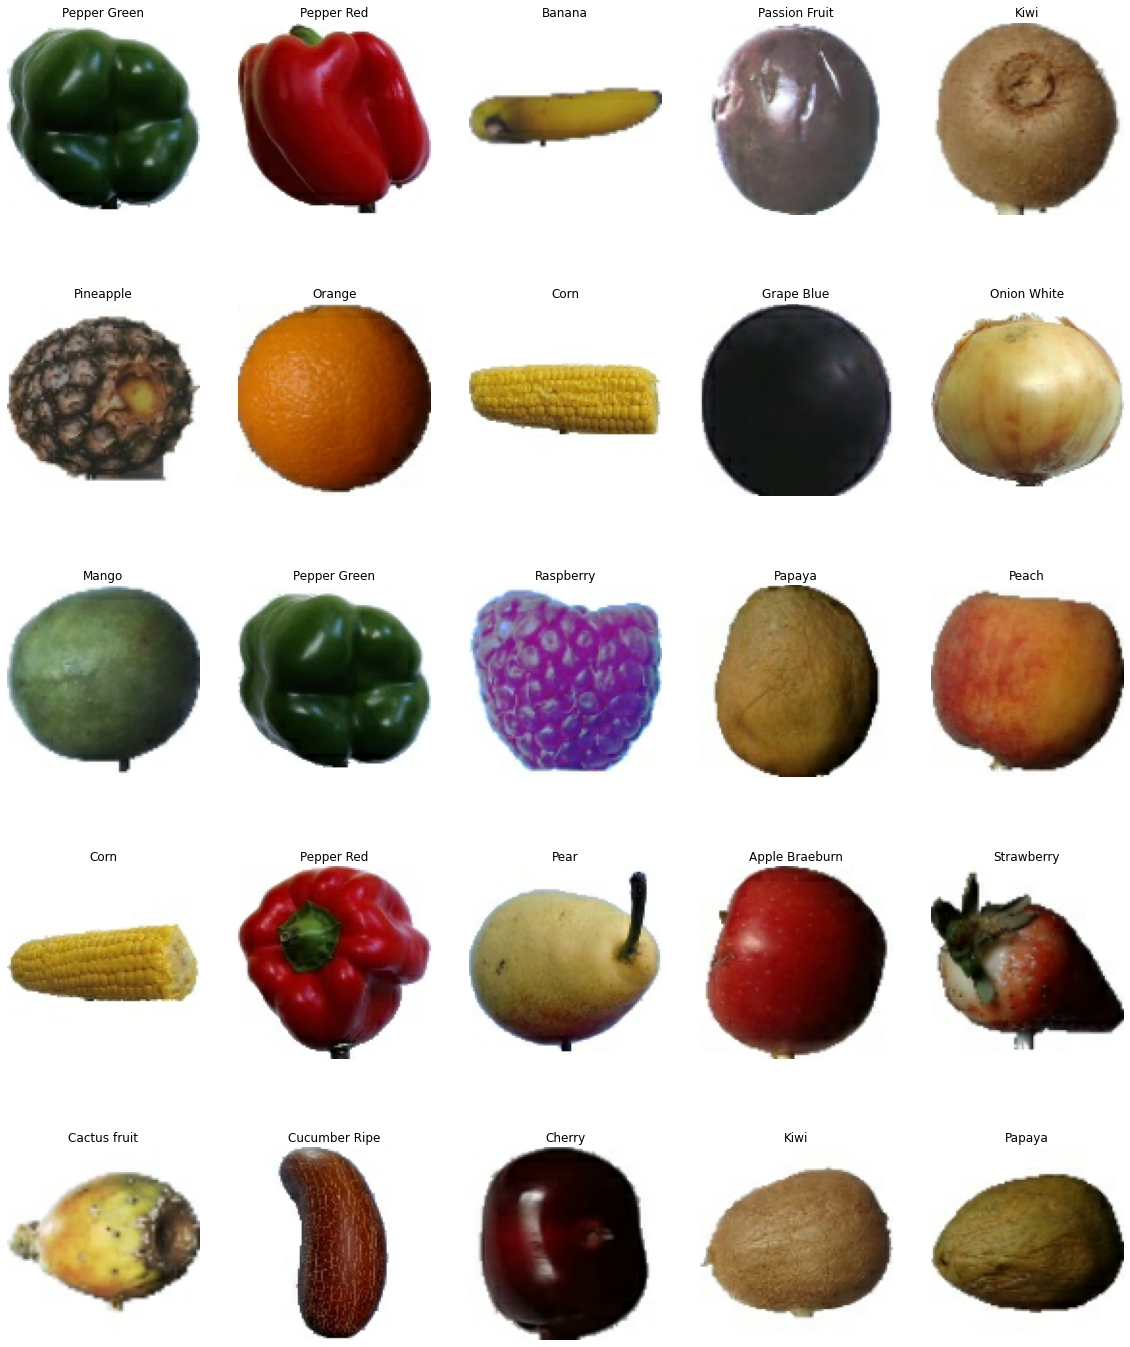

In [ ]:
# visualize sample images
attribute = image_dataset_from_directory(train_dir, image_size=(100,100))
plt.figure(figsize=(20,25))
for image, labels in attribute.take(1):
  for i in range (25):
    plt.subplot(5,5, i + 1)
    plt.imshow(np.array(image[i]).astype("uint8"))
    plt.title(attribute.class_names[labels[i]])
    plt.axis("off")

Explanation From EDA :
each image has a height and a width of 100x100. This is a collection of 33 images with a shape of 100x100x3 (the last dimension refers to the RGB color channel). Based on the dimensions of the images displayed, I visualized 25 fruit images random as representatives, which are as follows:

1. The image of green paper is more dominant in a darker or dark green color.
2. The paper red image has a brighter red color and a little green.
3. The picture of a banana has a slightly yellow color.
4. The passion fruit image has a dark gray color but some sides of the fruit are brown.
5. The image of kiwi is more dominant in light brown color.
6. The pineapple image has green color but some white and yellow dots.
7. Image Orange has a bright orange color that is more dominant.
8. The image of corn has a bright yellow dominant and some white dots.
9. The Grap Blue image has solid black.
10. The Onion White image has a brownish white.
11. The image of Manggo has a lighter green color.
12. The Raspberry image has a maroon color.
13. The papaya image has a yellow tint and some dark yellow parts.
14. The peach image has a red and slight tint.
15. The picture of a pear has a yellowish white color.
16. The Apple Breaburn image has a red color and some light yellow dots.
17. The strawberry image has a dark red color and some of it is white.
18. The picture of catcus fruit has a dark yellow color, some of it is bright yellow and there are some brown dots.
19. The image of a ripe cucumber has a brown tint and light brown stripes.
20. The cherry image has a dark red color and some bright red edges.

When viewed from the visualization of images based on colors represented on a scale of 0-255. The dataset that we have so many shades of green. The color of this fruit can affect the results of the model.

# 5 - Data Preprocessing

> This section contains the process of preparing data for the model training process, such as dividing the data into train-val-test, data transformation (normalization, encoding, etc.), and other necessary processes.

In [ ]:
# The seed function is used to generate the same random number on multiple code executions
tf.random.set_seed(10)

# Preprocess Augmentasi Data 
train_data= ImageDataGenerator(rescale = 1./255, validation_split=0.2) # normalisasi pixel
val_data= ImageDataGenerator(rescale = 1./255, validation_split=0.8)
test_data= ImageDataGenerator(rescale = 1./255)

The data augmentation process uses the ImageDataGenerator library to perform the image augmentation process. This process is used to reduce overfitting. If overfitting occurs, the performance of the training set tends to be better than the test set. Rescale as a parameter to normalize image pixels, division for train set 80%, validation 20% while test data uses all labels in the testing image fruit subdataset.

In [ ]:
# Use object datagen (pipeline)
training_data = train_data.flow_from_directory(train_dir,
                                            batch_size=64,target_size=(100, 100), # because the dataset image size is 100x100
                                            subset='training',class_mode='categorical',seed=10)

validation_data = val_data.flow_from_directory(train_dir,
                                               batch_size=64,target_size=(100, 100), # because the dataset image size is 100x100
                                               subset='training',class_mode='categorical',seed=10,shuffle=False) # shuffle only for validation

testing_data = test_data.flow_from_directory(val_dir,
                                            batch_size=64,target_size=(100, 100), # because the dataset image size is 100x100
                                            subset='training',class_mode='categorical',seed=46)

Found 13493 images belonging to 33 classes.
Found 3383 images belonging to 33 classes.
Found 5641 images belonging to 1 classes.


- Defines a training set object with the name training_data. All parameters and commands used are the same as those in the Keras documentation. The only thing that needs to be changed is the directory of the folder where I prepared the image. It should also be noted that the target_size must be the same as the information dataset i.e. 100×100. Batch_size I chose 64, meaning that for 13493 images in the training set, it will be divided into several sizes with 64 images each (there are 13493 images/64 batches). Then my class_mode uses 'catforical' because the output layer is only categorical (33 fruit labels).
- I also adjusted the folder directory for the Validation_data that I have, such as the size of training_data, but there is a parameter shuffle=False. After running, the spyder console will display the words "Found 3383 images belonging to 33 classes." This means that we have successfully detected the training_data directory.

- I also adjusted the folder directory for my test set.
After running, the spyder console will include the words "Found 5641 images belonging to 1 classes." This means that we have succeeded in detecting the directory there are 5641 fruit.

In [ ]:
# index label class train data
labelindex = training_data.class_indices
labelindex

{'Apple Braeburn': 0,
 'Apple Granny Smith': 1,
 'Apricot': 2,
 'Avocado': 3,
 'Banana': 4,
 'Blueberry': 5,
 'Cactus fruit': 6,
 'Cantaloupe': 7,
 'Cherry': 8,
 'Clementine': 9,
 'Corn': 10,
 'Cucumber Ripe': 11,
 'Grape Blue': 12,
 'Kiwi': 13,
 'Lemon': 14,
 'Limes': 15,
 'Mango': 16,
 'Onion White': 17,
 'Orange': 18,
 'Papaya': 19,
 'Passion Fruit': 20,
 'Peach': 21,
 'Pear': 22,
 'Pepper Green': 23,
 'Pepper Red': 24,
 'Pineapple': 25,
 'Plum': 26,
 'Pomegranate': 27,
 'Potato Red': 28,
 'Raspberry': 29,
 'Strawberry': 30,
 'Tomato': 31,
 'Watermelon': 32}

# 6 - Model Definition

> This section contains cells to define the model. Explain the reasons for using an algorithm/model/architecture, the hyperparameters used, the types of metrics used, and other things related to the model.

In [ ]:
# CNN Initialization
model = tf.keras.models.Sequential()

# configuration layer 1
model.add(Conv2D(33, 3, padding = 'same', activation='relu',input_shape=(100,100,3))) # number of features/adjust the data, if the color image is added the number 3
model.add(MaxPool2D(2)) # Maxpool with 2x2 matrix

# configuration layer 2
model.add(Conv2D(66, 3, padding = 'same', activation='relu'))
model.add(MaxPool2D(2))

# configuration layer 3
model.add(Conv2D(99, 3, padding = 'same', activation='relu'))
model.add(MaxPool2D(2))

# configuration layer 4
model.add(Conv2D(128, 3, padding = 'same', activation='relu'))
model.add(MaxPool2D(2))

# flattend
model.add(Flatten())
model.add(Dense(33, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(33, activation='softmax')) 


Elements Model Definition :
- CNN Initialization uses sublibrary sequential to start neural networks with the help of tf.Keras.model where most of the image fruit classification label features are trained with algorithms that provide multiple sequences to the model.

- Configuration layer 1, the first stage of starting CNN is used Convolution2D, because it will process data in the form of special images for 2 dimensions. Then fill in the filter parameter = 33, meaning that it uses 33 image label features that are entered into the input layer measuring 100×100 pixels, and measuring 3 as color images. In Tensorflow for SAME will try to spread the input evenly on the left and right. Relu activation is closer to the way biological neurons work in classifying outputs. The second stage starts MaxPooling2D, by taking the maximum value from the 2x2 dimensional image matrix. Because I am processing the image, so we use maxpooling for 2 dimensions. This process is a step to reduce the size of feature maps by finding the maximum value.

- Configuration layer 2, The first stage of Convolution2D uses a second layer filter parameter of 66 neurons of size 3 as a color image, using a flom sensor in the form of same and relu activation. The second stage of MaxPlooling2D is to reduce the size of feature maps by finding the maximum value from a 2x2 dimensional matrix.

- Configuration layer 3, The first stage of Convolution2D uses a second layer filter parameter of 99 neurons of size 3 as a color image, using a flom sensor in the form of same and relu activation. The second stage of MaxPlooling2D is to reduce the size of feature maps by finding the maximum value from a 2x2 dimensional matrix.

- Configuration layer 4, The first stage of Convolution2D uses a second layer filter parameter of 128 neurons of size 3 as a color image, using a flom sensor in the form of same and relu activation. The second stage of MaxPlooling2D is to reduce the size of feature maps by finding the maximum value from a 2x2 dimensional matrix.

- Flattend, the first stage of the Flatten Sublibrary is used for the flattening process to make all matrices a single vector size which will be the input for neural networks in front of it. The Dense sublibrary is used to define neural networks parameters that I expect to fit 33 image labels. Using the activation function for the output is softmax because the result is more than two categories, but 33 fruit categories.

In [ ]:
# callback at 100% accuracy
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights=True)]

# model compile
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",metrics=['accuracy'])

I will use the adam optimizer because it can handle sparse gradients in noisy problems. Loss uses 'categorical_crossentropy' because the expected output is multiclass (33 classification labels) while the evaluation matrix uses accuracy.

In [ ]:
# the arrangement of the neuron network model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 33)      924       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 33)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 66)        19668     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 66)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 99)        58905     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 99)       0

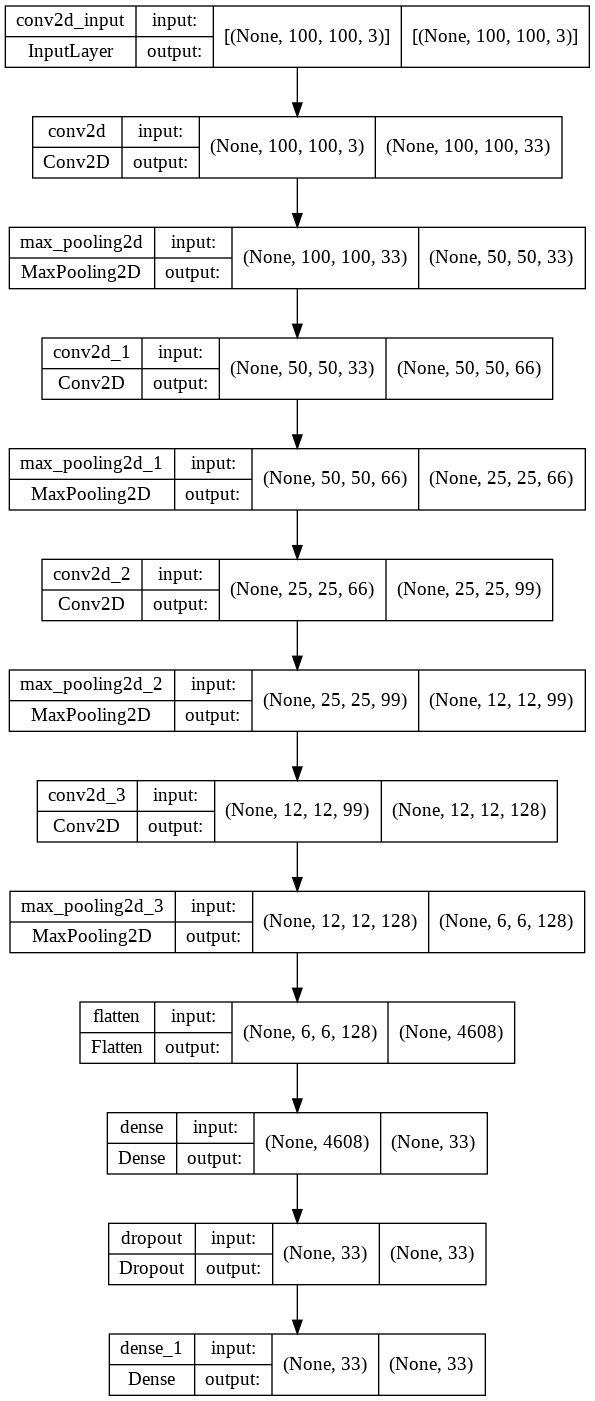

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

# 7 - Model Training

> The cells in this section only contain code for training the model and the resulting output. Do the training process several times with different hyperparameters to see the results obtained. Analyze and narrate these results in the Model Evaluation section.

In the model training step, apply the model to training_data, then validate the results to validation_data. The steps_per_epoch parameter is filled with the number of images in the training_set (16854 images) divided by the number of files per epoch (33 labels), so it is filled with 16854/33. The epochs parameter is filled as we wish. The more, the better the accuracy, but if it converges the accuracy will not increase again, using epochs of 100. Verbose value of 1 appears like a Progress bar showing the epochs per step. The callback looks for the most high-order function loss and accuracy values.

In [ ]:
# training model
%time

project = model.fit(training_data, epochs = 100, verbose=1, validation_data = validation_data, callbacks=callbacks)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs
Epoch 1/100
211/211 [==============================] - 4556s 22s/step - loss: 1.6836 - accuracy: 0.4997 - val_loss: 0.2168 - val_accuracy: 0.9690
Epoch 2/100
211/211 [==============================] - 28s 134ms/step - loss: 0.5170 - accuracy: 0.8244 - val_loss: 0.0612 - val_accuracy: 0.9899
Epoch 3/100
211/211 [==============================] - 28s 134ms/step - loss: 0.3829 - accuracy: 0.8654 - val_loss: 0.0233 - val_accuracy: 0.9991
Epoch 4/100
211/211 [==============================] - 29s 139ms/step - loss: 0.3327 - accuracy: 0.8812 - val_loss: 0.0322 - val_accuracy: 0.9982
Epoch 5/100
211/211 [==============================] - 29s 136ms/step - loss: 0.3122 - accuracy: 0.8880 - val_loss: 0.0242 - val_accuracy: 0.9982
Epoch 6/100
211/211 [==============================] - 28s 134ms/step - loss: 0.2631 - accuracy: 0.9023 - val_loss: 0.0236 - val_accuracy: 0.9941
Epoch 7/100
211/211 [==============================] - 29s 1

It can be seen that it has 100 epochs. The explanation for each value in each epoch is as follows:

- Loss represents the value of the loss function in the training set. We want this value to be smaller for the next iteration of the epoch. The loss value in the training set is quite small, namely 0.1077. Even though the value is 0, but from the epoch iteration above this value still shows up and down.
- Accuracy states the value of accuracy in the training set. We want this value to get bigger for the next iteration. Then the accuracy value is very high, namely 96%. This value can also be increased again by adding the epoch.
- Val_loss is the value of the loss function in the validation set. We want this value to get smaller for the next iteration. Val_loss shows a very small number, namely 0.0012.
- Val_accuracy is the accuracy value in the validation set. We want this value to get smaller for the next iteration. The value of val_acc is also very perfect, which is 100%. This value indicates that the CNN model is able to distinguish fruit images in the validation set.

It should be noted that the distance between acc and val_acc is very good because the values ​​are between 96% and 100%. If the distance is still far, there is a tendency for overfitting to occur. But the distance between accuracy training and validation is said to be good fit because the accuracy range is still close.

# 8 - Model Evaluation

> In this section, an evaluation of the model is carried out which must show how the model performs based on the selected metrics. This should be demonstrated by visualizing the performance trend and/or model error rate. Perform analysis related to the results on the model and write down the results of the analysis.

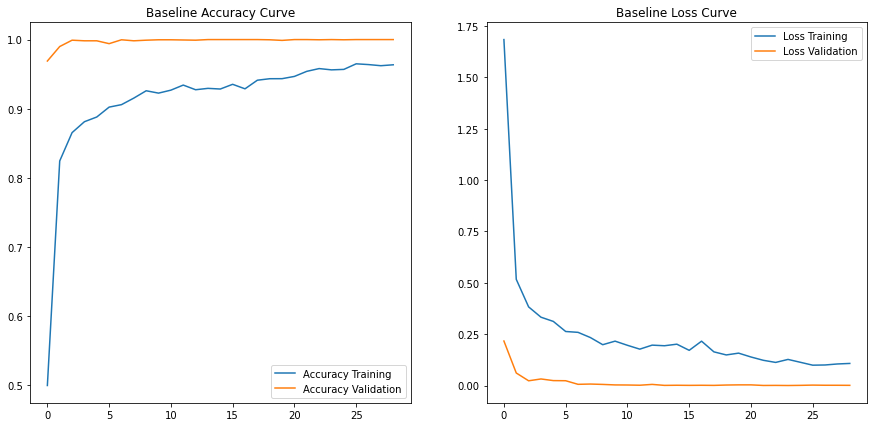

In [ ]:
# evaluation model evaluation in plot shape
metrics = pd.DataFrame(project.history) #create dataframe of learn model training

#accuracy plot
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(metrics.accuracy, label='Accuracy Training')
plt.plot(metrics.val_accuracy, label='Accuracy Validation')
plt.title('Baseline Accuracy Curve')
plt.legend()

#loss plot
plt.subplot(1, 2, 2)
plt.plot(metrics.loss, label='Loss Training')
plt.plot(metrics.val_loss, label='Loss Validation')
plt.title('Baseline Loss Curve')
plt.legend()
plt.show()

Baseline Loss Curve: An image is also created showing two line plots, the top one with cross-entropy loss over epochs for the train (blue) and validation (orange) datasets, and the bottom plot showing the classification loss over epochs. The plot shows that the convergence training process is very good, indicating that training and validation are still equivalent. The plot for loss is good, given the continuous nature of the error between probability distributions.

Baseline Accuracy Curve: An image is also created showing two line plots, the top one with cross-entropy accuracy over epochs for the train (blue) and validation (orange) datasets, and the bottom plot showing classification accuracy over epochs. Line plots for accuracy show bumps, exemplify the train and test datasets that can ultimately only be predicted as true or false, providing less granular feedback on performance.

In [ ]:
# classification validation set
y_pred = model.predict(validation_data)
y_pred = np.argmax(y_pred, axis=1)

report_val = classification_report(validation_data.labels, 
                                    y_pred, labels = np.arange(33), 
                                    target_names= list(validation_data.class_indices.keys()))
print(report_val)

                    precision    recall  f1-score   support

    Apple Braeburn       1.00      1.00      1.00        99
Apple Granny Smith       1.00      1.00      1.00        99
           Apricot       1.00      1.00      1.00        99
           Avocado       1.00      1.00      1.00        86
            Banana       1.00      1.00      1.00        98
         Blueberry       1.00      1.00      1.00        93
      Cactus fruit       1.00      1.00      1.00        98
        Cantaloupe       1.00      1.00      1.00        99
            Cherry       1.00      1.00      1.00        99
        Clementine       1.00      1.00      1.00        98
              Corn       1.00      1.00      1.00        90
     Cucumber Ripe       1.00      1.00      1.00        79
        Grape Blue       1.00      1.00      1.00       197
              Kiwi       1.00      1.00      1.00        94
             Lemon       1.00      1.00      1.00        99
             Limes       1.00      1.00

classification report validation set, where sellers, buyers or companies providing services to the plantation sector can classify fruit based on its type (33 fruit labels). Recall 0 and recall 1 predict that 100% correctly classifies. The overall accumulation of classifications between fruit labels is 100%.

# 9 - Model Improvment

In [ ]:
# CNN Initialization 
_input = tf.keras.layers.Input(shape=(100,100,3))
improv = _input

# configuration layer 1
improv = Conv2D(33, 3, padding = 'same', activation = 'elu')(improv)
improv = Conv2D(33, 3, padding = 'same', activation = 'elu')(improv)
improv = MaxPool2D((2))(improv)

# configuration layer 2
improv = Conv2D(66, 3, padding = 'same',activation = 'elu')(improv)
improv = Conv2D(66, 3, padding = 'same',activation = 'elu')(improv)
improv = MaxPool2D((2))(improv)

# configuration layer 3
improv = Conv2D(99, 3, padding = 'same',activation = 'elu')(improv)
improv = Conv2D(99, 3, padding = 'same',activation = 'elu')(improv)
improv = MaxPool2D((2))(improv)

# configuration layer 4
improv = Conv2D(128, 3, padding = 'same',activation = 'elu')(improv)
improv = MaxPool2D((2))(improv)

# flattend
improv = Flatten()(improv)
improv = Dense(33, activation='elu')(improv) #use better activation
improv = Dropout(0.2)(improv)
improv = Dense(33, activation='softmax')(improv) #output

# Model improvment
model_improv = tf.keras.models.Model(_input, improv)

# model compile
opt = tf.keras.optimizers.Adam(epsilon=0.01)
model_improv.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

model_improv.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 33)      924       
                                                                 
 conv2d_5 (Conv2D)           (None, 100, 100, 33)      9834      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 33)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 50, 66)        19668     
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 66)        39270     
                                                             

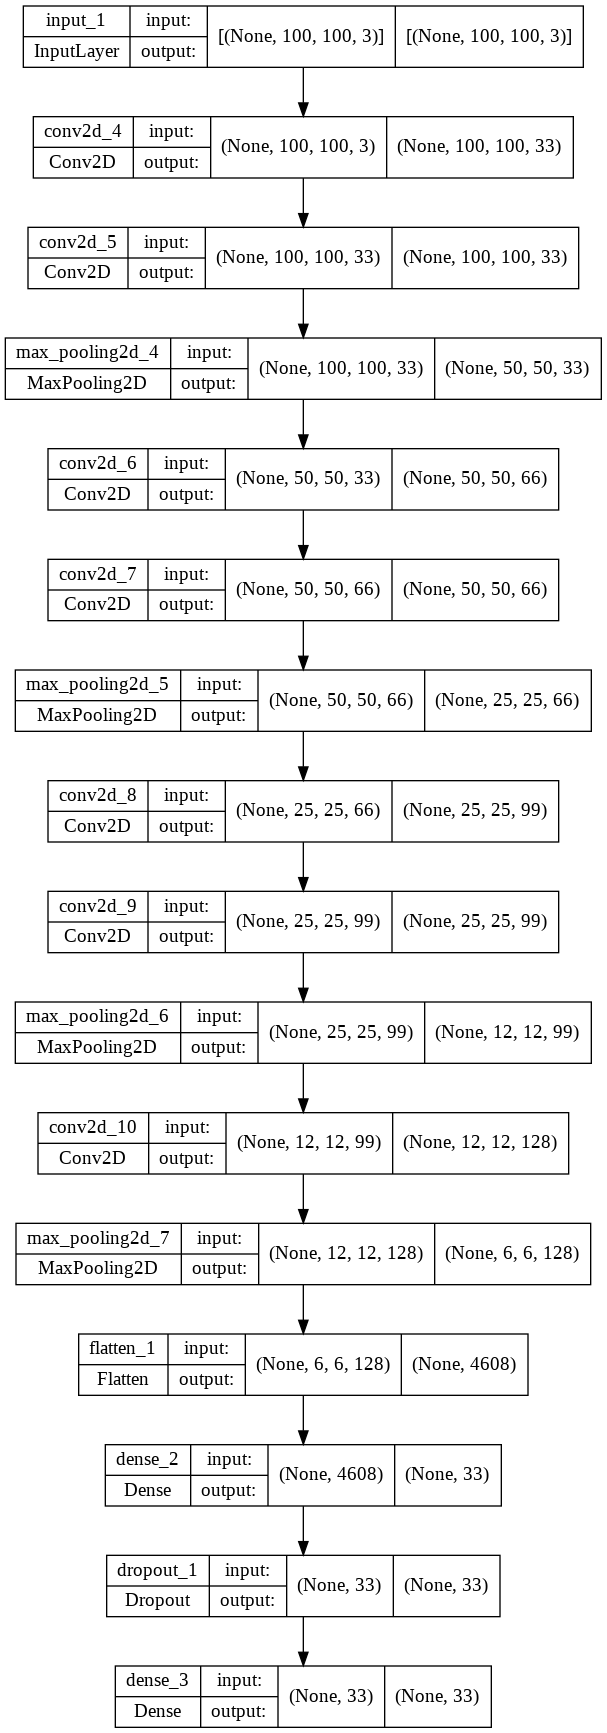

In [ ]:
tf.keras.utils.plot_model(model_improv, show_shapes=True)

In [ ]:
# training model improvment
%time

project_improv = model_improv.fit(training_data, epochs = 100, verbose=1, validation_data = validation_data, callbacks = callbacks)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
Epoch 1/100
211/211 [==============================] - 31s 142ms/step - loss: 1.9246 - accuracy: 0.4615 - val_loss: 0.1769 - val_accuracy: 0.9595
Epoch 2/100
211/211 [==============================] - 29s 137ms/step - loss: 0.1845 - accuracy: 0.9430 - val_loss: 0.0190 - val_accuracy: 0.9953
Epoch 3/100
211/211 [==============================] - 29s 137ms/step - loss: 0.0814 - accuracy: 0.9751 - val_loss: 0.0059 - val_accuracy: 0.9991
Epoch 4/100
211/211 [==============================] - 35s 166ms/step - loss: 0.0631 - accuracy: 0.9785 - val_loss: 0.0112 - val_accuracy: 0.9973
Epoch 5/100
211/211 [==============================] - 29s 138ms/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0047 - val_accuracy: 0.9997
Epoch 6/100
211/211 [==============================] - 30s 141ms/step - loss: 0.0250 - accuracy: 0.9932 - val_loss: 4.7073e-04 - val_accuracy: 1.0000
Epoch 7/100
211/211 [==============================] - 3

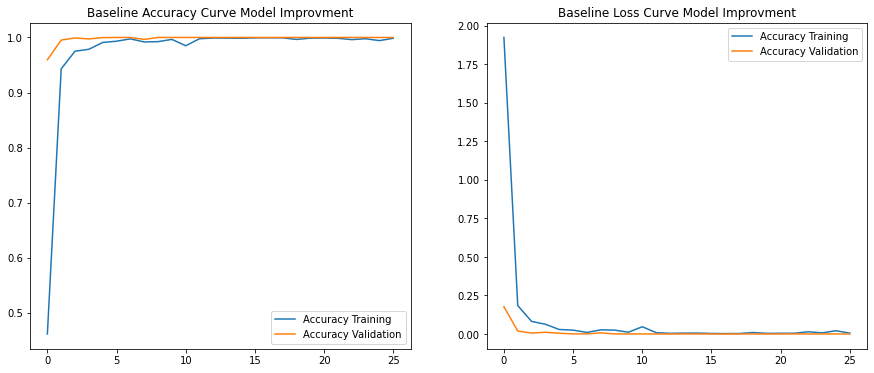

In [ ]:
# evaluation model improvment evaluation in plot shape
metrics = pd.DataFrame(project_improv.history) #create dataframe of history

#accuracy plot model improvment
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(metrics.accuracy, label='Accuracy Training')
plt.plot(metrics.val_accuracy, label='Accuracy Validation')
plt.title('Baseline Accuracy Curve Model Improvment')
plt.legend()

#loss plot model improvment
plt.subplot(1, 2, 2)
plt.plot(metrics.loss, label='Accuracy Training')
plt.plot(metrics.val_loss, label='Accuracy Validation')
plt.title('Baseline Loss Curve Model Improvment')
plt.legend()
plt.show()

In [ ]:
# classification validation set model improvment
y_pred_improv = model_improv.predict(validation_data)
y_pred_improv = np.argmax(y_pred_improv, axis=1)

announce_improv = classification_report(validation_data.labels, 
                                    y_pred_improv, labels = np.arange(33), 
                                    target_names= list(validation_data.class_indices.keys()))
print(announce_improv)

                    precision    recall  f1-score   support

    Apple Braeburn       1.00      1.00      1.00        99
Apple Granny Smith       1.00      1.00      1.00        99
           Apricot       1.00      1.00      1.00        99
           Avocado       1.00      1.00      1.00        86
            Banana       1.00      1.00      1.00        98
         Blueberry       1.00      1.00      1.00        93
      Cactus fruit       1.00      1.00      1.00        98
        Cantaloupe       1.00      1.00      1.00        99
            Cherry       1.00      1.00      1.00        99
        Clementine       1.00      1.00      1.00        98
              Corn       1.00      1.00      1.00        90
     Cucumber Ripe       1.00      1.00      1.00        79
        Grape Blue       1.00      1.00      1.00       197
              Kiwi       1.00      1.00      1.00        94
             Lemon       1.00      1.00      1.00        99
             Limes       1.00      1.00

# 10 - Model Savings

> By looking at the results of the model evaluation, choose the best model to save. This best model will be reused in deploying Heroku.

In [ ]:
# Freeze model parameters
model.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 33)      924       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 33)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 66)        19668     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 66)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 99)        58905     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 99)       0

In [ ]:
# navigate to home folder
% cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
# check the folder we are in now
! ls

'Colab Notebooks'   fruit   kartun_cnn	 tf_milestone   tf_serving


In [ ]:
# go to tf_milestone
% cd tf_milestone

/content/drive/MyDrive/tf_milestone


In [ ]:
# Save model
model.save("fruit-classification")

INFO:tensorflow:Assets written to: fruit-classification/assets


# 11 - Inference Model

> The model that has been trained will be tested on data that is not included in the train-set or test-set. This data must be in the original format, not scaled data.

In [ ]:
# Inference Newdata
from google.colab import files
def predict() :
  UploadImgage = files.upload()

  for fn in UploadImgage.keys():
    path = fn
    img = tf.keras.utils.load_img(path, target_size=(100,100)) # must match the previous input
    plt.imshow(img)
    plt.axis('Off')
    plt.show()
    img_array = tf.keras.utils.img_to_array(img) # to convert image into array
    img_array = tf.expand_dims(img_array, 0) # Expand the array form eg 1D to 2D, 0 means row/horizontal [[1, 2]]
    
    predictions = model.predict(img_array) # use the best model, for example the variable model or model_improv to predict images
    score = tf.nn.softmax(predictions[0])
    print("This image is most likely fruit {} ."
    .format(label_names[np.argmax(score)]))

Saving Banana_0.jpg to Banana_0.jpg


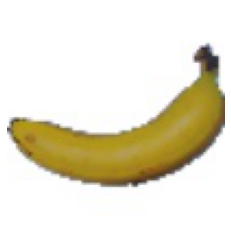

This image is most likely fruit Banana .


In [ ]:
predict()

Saving Watermelon_18.jpg to Watermelon_18.jpg


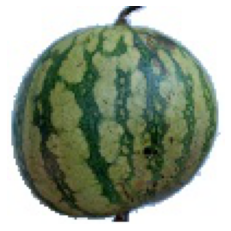

This image is most likely fruit Watermelon .


In [ ]:
predict()

Saving Onion White_3.jpg to Onion White_3.jpg


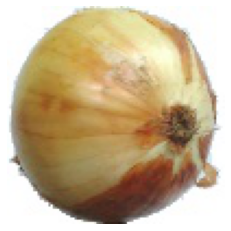

This image is most likely fruit Onion White .


In [ ]:
predict()

Saving Strawberry_0.jpg to Strawberry_0.jpg


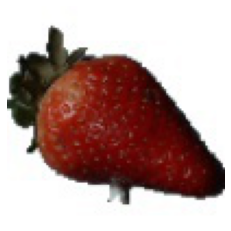

This image is most likely fruit Strawberry .


In [ ]:
predict()

Saving Raspberry_7.jpg to Raspberry_7.jpg


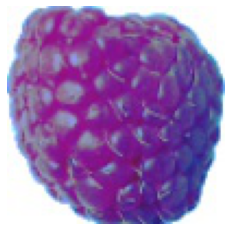

This image is most likely fruit Raspberry .


In [ ]:
predict()

Saving Clementine_0.jpg to Clementine_0.jpg


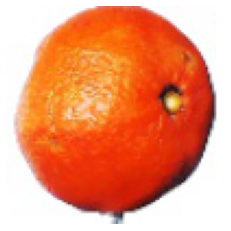

This image is most likely fruit Clementine .


In [ ]:
predict()

# 12 - Conclusion

Based on the problems that have been described at the beginning, I tried to use an artificial network of image processing that can classify the types of fruit, so that what will be sent can arrive on time without sorting the fruit manually and customers waiting in long lines to buy fruit because the cashier detects the type of fruit to be made. purchased by the customer. Therefore, a model test was carried out, in order to better assist the workers or servants in detecting the type of fruit in order to avoid the fruit sorting process which took so long. So that the analysis is carried out Based on the problems that have been described at the beginning, I tried to use an artificial network of image processing that can classify the types of fruit, so that what will be sent can arrive on time without sorting the fruit manually and customers waiting in long lines to buy fruit because the cashier detects the type of fruit to be made purchased by the customer in the case of fruit classification, as follows:

----------------------

**Exploratory Data Analysis (EDA)**

- There are 33 types of fruit here: Apple Braeburn, Apple Granny Smith, Apricot, Avocado, Banana, Blueberry, Cactus fruit, Cantaloupe, Cherry, Clementine, Corn, Cucumber Ripe, Grape Blue, Kiwi, Lemon, Limes, Mango, Onion White , Orange, Papaya, Passion Fruit, Peach, Pear, Pepper Green, Pepper Red, Pineapple, Plum, Pomegranate, Potato Red, Raspberry, Strawberry, Tomato and Watermelon.
- Fruit images have many different colors
- Some images have low stature and fruit images do not describe the type which can affect the model results

----------------

**Model Analysis**

- Elements Model Definition CNN Initialization terdiri dari parameter uses sublibrary sequential to start neural networks with the help of tf.Keras.model. Layer 1 is 33 neuron, meaning that it uses 33 image label features that are entered into the input layer measuring 100×100 pixels and with activation relu, Layer 2 is 66 neurons with activation relu, Layer 3 is 99 neurons with activation relu dan Layer 4 is 128 neurons with activation relu. Set up dropout in 0.2 for randomly and using optimizer = Adam
- Using the activation function for the output is softmax because the result is more than two categories, but 33 fruit categories.
- Accuracy and val_Accuracy is very good because the values ​​are between 96% and 100%. There is a tendency metrics for goodfit. Distance between accuracy training and validation is said to be good fit because the accuracy range is still close.
- The plot shows that the convergence training process is very good, indicating that training and validation are still equivalent. The plot for loss is good, given the continuous nature of the error between probability distributions.
- The model improvment, using Layer 1 as many as 33 neurons, meaning that it uses 33 image label features that are entered into the input layer measuring 100×100 pixels and with elu activation, Layer 2 as many as 66 neurons with elu activation, Layer 3 as many as 99 neurons with elu activation and Layer 4 is 128 neurons with elu activation. As well as compile the parameter model in the Adam optimizer with epsilon=0.01.
- The improved model showed the best results because there was a significant improvement in accuracy and loss, so I chose my base model as my prediction.

-----

**Information on image classification context conclusions**

Advantages :
- Based on the model that has been formed, it will provide solutions or help companies exporting fruit from the Indonesian agricultural sector to be able to pack them faster, because employees do not see the visuals of fruit one by one and then separate them by type. But with the new model that I have created, it can help companies to scan fruit or upload fruit images, which automatically tell the type of fruit group, thus speeding up fruit classification. This has a good impact in shortening working time.
- As well as helping cashiers more quickly detect the type of fruit, thus speeding up payments at the cashier and not piling up customer queues.

Suggestion :
- This dataset only classifies 33 fruits, while as we all know that the types of fruit in Indonesia are very diverse, each region has different characteristics of fruit, seen in the market there are various kinds of fruit, for the next project maybe we will try added fruit classification so that more information can classify fruit.
- There are some images that are contaminated with color in the background, so we can use object detection so that the model can focus more on the object that we are going to predict
- In fact, in supermarkets we not only need the classification of an object but we need the price of the object. for the next project maybe we will calculate the weight x price to be more representative.